In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [51]:
mcdonalds = pd.read_csv("mcdonalds.csv")
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [52]:
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ameyj\AppData\Local\Temp\ipykernel_26260\3986840518.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


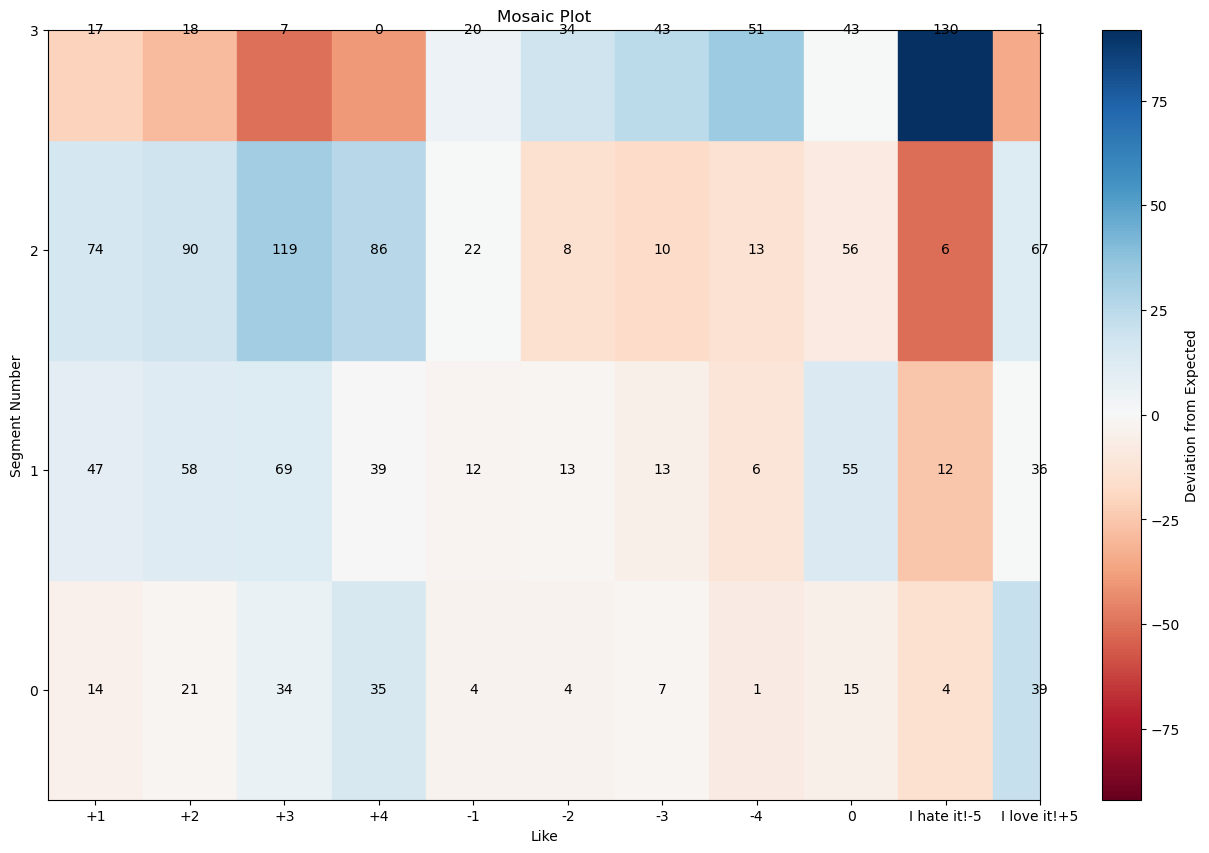

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the CSV file into a DataFrame
csv_file = "mcdonalds.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file)

# Preprocess the data
# Convert categorical columns to numeric
categorical_cols = [
    "yummy",
    "convenient",
    "spicy",
    "fattening",
    "greasy",
    "fast",
    "cheap",
    "tasty",
    "expensive",
    "healthy",
    "disgusting",
]
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Select features for clustering (excluding non-feature columns)
features = df[categorical_cols]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Assuming 4 clusters
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Create a contingency table
contingency_table = pd.crosstab(df["Cluster"], df["Like"])

# Compute observed and expected frequencies
observed = contingency_table.values
row_totals = observed.sum(axis=1, keepdims=True)
col_totals = observed.sum(axis=0, keepdims=True)
total = observed.sum()

expected = (row_totals @ col_totals) / total

# Calculate deviations and normalize for shading
deviation = observed - expected
norm = mcolors.Normalize(
    vmin=-np.max(np.abs(deviation)), vmax=np.max(np.abs(deviation))
)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot each cell with color indicating deviation
for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        rect = plt.Rectangle(
            (j, i), 1, 1, color=plt.cm.RdBu(norm(deviation[i, j])), edgecolor="black"
        )
        ax.add_patch(rect)
        # Add text to each cell
        ax.text(
            j + 0.5,
            i + 0.5,
            f"{observed[i, j]}",
            ha="center",
            va="center",
            color="black",
        )

# Customize plot
ax.set_xticks(np.arange(contingency_table.shape[1]) + 0.5)
ax.set_yticks(np.arange(contingency_table.shape[0]) + 0.5)
ax.set_xticklabels(contingency_table.columns)
ax.set_yticklabels(range(observed.shape[0]))  # Use cluster numbers for y-axis
ax.set_xlabel("Like")
ax.set_ylabel("Segment Number")
ax.set_title("Mosaic Plot")

# Create a colorbar for shading
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Deviation from Expected")

plt.show()

In [54]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


C:\Users\ameyj\AppData\Local\Temp\ipykernel_26260\1283782155.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


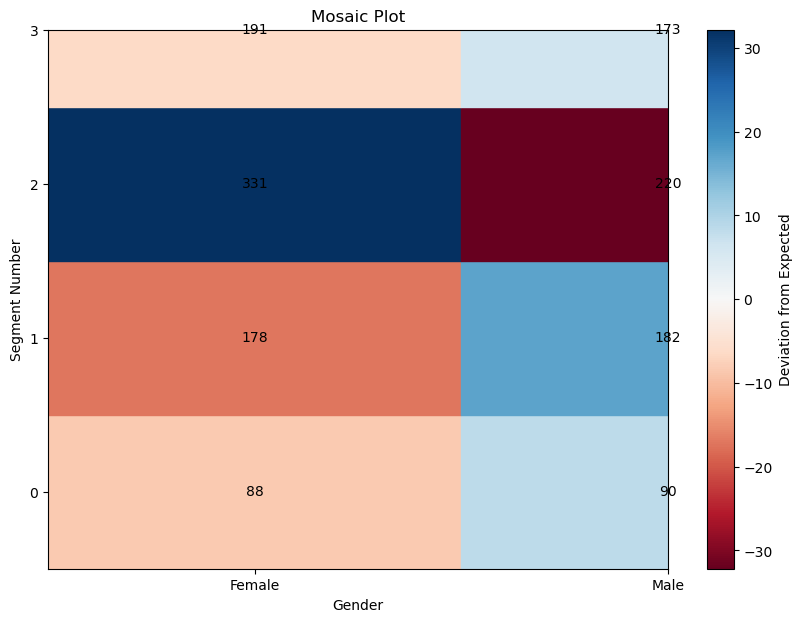

In [55]:
from sklearn.preprocessing import LabelEncoder

# Create a contingency table
contingency_table = pd.crosstab(df["Cluster"], df["Gender"])

# Compute observed and expected frequencies
observed = contingency_table.values
row_totals = observed.sum(axis=1, keepdims=True)
col_totals = observed.sum(axis=0, keepdims=True)
total = observed.sum()

expected = (row_totals @ col_totals) / total

# Calculate deviations and normalize for shading
deviation = observed - expected
norm = mcolors.Normalize(
    vmin=-np.max(np.abs(deviation)), vmax=np.max(np.abs(deviation))
)

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot each cell with color indicating deviation
for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        rect = plt.Rectangle(
            (j, i), 1, 1, color=plt.cm.RdBu(norm(deviation[i, j])), edgecolor="black"
        )
        ax.add_patch(rect)
        # Add text to each cell
        ax.text(
            j + 0.5,
            i + 0.5,
            f"{observed[i, j]}",
            ha="center",
            va="center",
            color="black",
        )

# Customize plot
ax.set_xticks(np.arange(contingency_table.shape[1]) + 0.5)
ax.set_yticks(np.arange(contingency_table.shape[0]) + 0.5)
ax.set_xticklabels(contingency_table.columns)
ax.set_yticklabels(range(observed.shape[0]))  # Use cluster numbers for y-axis
ax.set_xlabel("Gender")
ax.set_ylabel("Segment Number")
ax.set_title("Mosaic Plot")

# Create a colorbar for shading
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Deviation from Expected")

plt.show()

C:\Users\ameyj\AppData\Local\Temp\ipykernel_26260\1288100503.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


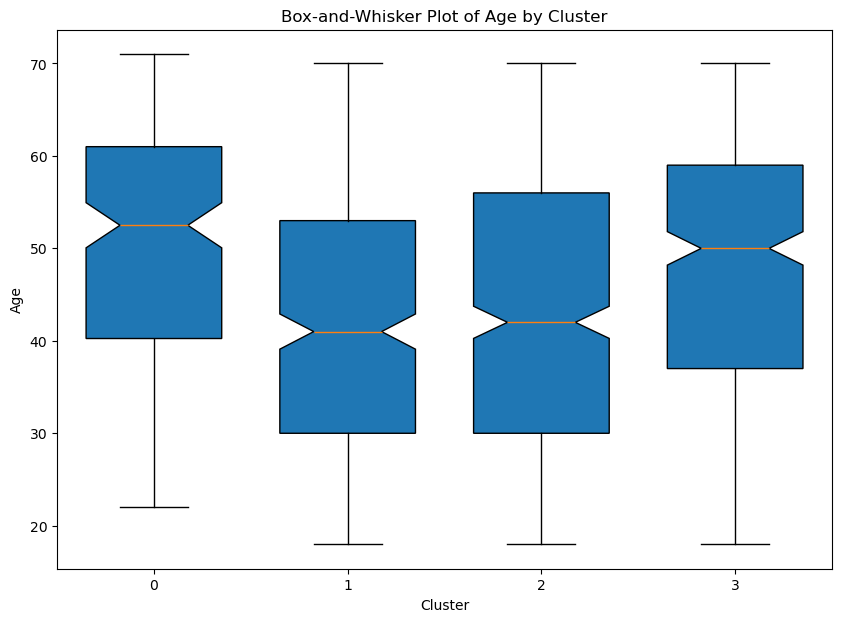

In [56]:
# Ensure you have a 'Cluster' column in your DataFrame
if "Cluster" not in df.columns:
    raise ValueError("The 'Cluster' column is missing from the DataFrame.")

# Create the boxplot using matplotlib
plt.figure(figsize=(10, 7))

# Create the boxplot
plt.boxplot(
    [df[df["Cluster"] == i]["Age"] for i in range(df["Cluster"].nunique())],
    labels=[f"{i}" for i in range(df["Cluster"].nunique())],
    notch=True,
    widths=0.7,
    patch_artist=True,
)

# Customize the plot
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Box-and-Whisker Plot of Age by Cluster")

# Show the plot
plt.show()

In [57]:
# Convert 'Gender' to numeric values
df["Gender_numeric"] = (df["Gender"] == "Female").astype(int)

# Convert 'Like' to numeric, using errors='coerce' to handle any non-numeric values
df["Like"] = pd.to_numeric(df["Like"], errors="coerce")

# Convert 'VisitFrequency' to numeric, using the mapping we discussed
visit_mapping = {
    "More than once a week": 5,
    "Once a week": 1,
    "Once a month": 0.25,
    "Every three months": 0.1,
    "Once a year": 0.05,
    "Never": 0,
}
df["VisitFrequency"] = df["VisitFrequency"].map(visit_mapping)

# Check for any potential issues with the data
print(df[["Like", "VisitFrequency"]].head())

   Like  VisitFrequency
0  -3.0            0.10
1   2.0            0.10
2   1.0            0.10
3   4.0            1.00
4   2.0            0.25


In [58]:
# Recalculate mean values by Cluster
visit = df.groupby("Cluster")["VisitFrequency"].mean()
like = df.groupby("Cluster")["Like"].mean()
female = df.groupby("Cluster")["Gender_numeric"].mean()

# Ensure no NaN values are present
visit = visit.dropna()
like = like.loc[visit.index]
female = female.loc[visit.index]

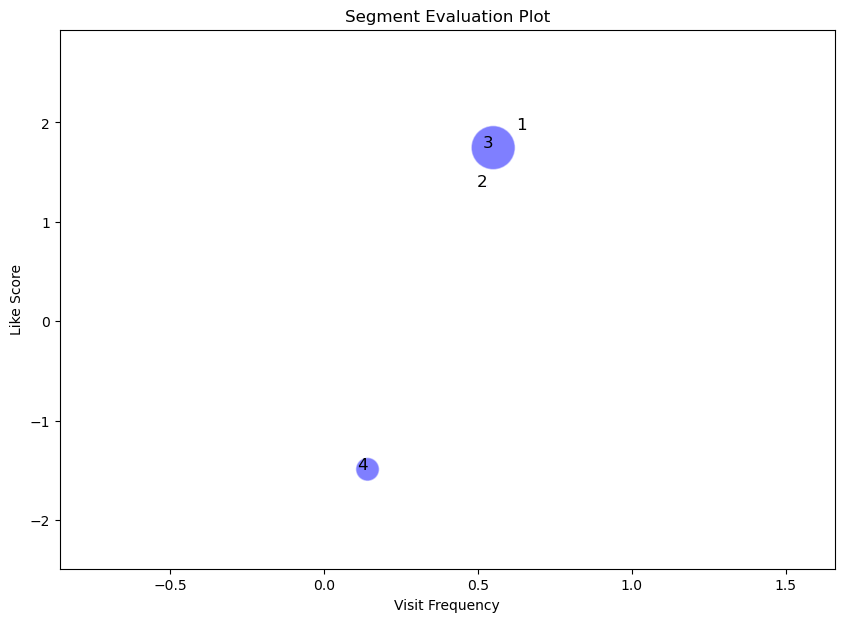

In [59]:
# Normalize or scale female values for bubble sizes
scaled_female = (female - female.min()) / (female.max() - female.min()) * 1000

# Create the plot
plt.figure(figsize=(10, 7))

# Scatter plot with scaled bubble sizes
plt.scatter(visit, like, s=scaled_female, alpha=0.5, edgecolors="w", c="b", marker="o")

# Add text labels for each cluster
for i, cluster in enumerate(range(len(visit))):
    plt.text(visit[i], like[i], str(i + 1), fontsize=12, ha="right")

# Customize the plot
plt.xlabel("Visit Frequency")
plt.ylabel("Like Score")
plt.title("Segment Evaluation Plot")

# Set axis limits
plt.xlim(visit.min() - 1, visit.max() + 1)
plt.ylim(like.min() - 1, like.max() + 1)

# Display the plot
plt.show()